In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [2]:
# 맷플롯립 한글 설정 
# matplotlib Korean font
plt.rc('font', family='Malgun Gothic')
# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# 컬럼의 너비 제한 해제
pd.set_option('display.max_colwidth', None)

# 출력할 행의 수를 설정 (필요에 따라 조정)
pd.set_option('display.max_rows', 300)

In [24]:
# 지도 데이터 불러오고 좌표 설정

# 행정구역 경계 데이터 경로
sejong_path = "00data/세종특별자치시/36000"

data_path_build = sejong_path + "/TL_SPBD_BULD.shp"
data_path_rw = sejong_path + "/TL_SPRD_RW.shp"

# Shapefile 데이터 불러오기
building = gpd.read_file(data_path_build, encoding='euc-kr')
rw_poly = gpd.read_file(data_path_rw, encoding='euc-kr')
sejong_zone_adm = gpd.read_file('00data/11.세종시_대상구역도.geojson')
# 100x100 격자 데이터
area_grid = gpd.read_file('00data/4.세종시_격자(매핑용).geojson')

# 좌표계 설정
building = building.set_crs('EPSG:5179')
rw_poly = rw_poly.set_crs('EPSG:5179')
building_4326 = building.to_crs(epsg=4326)
rw_poly_4326 = rw_poly.to_crs(epsg=4326)

# 대상구역계 바운더리 추출
sejong_zone_adm_boundary = sejong_zone_adm.boundary

# 대상구역계 안에 있는 정보만 클리핑 및 추출
rw_poly_clipped = gpd.clip(rw_poly_4326, sejong_zone_adm)
building_clipped = gpd.sjoin(building_4326, sejong_zone_adm, how='inner', op='within')

# 겹치는 부분만 남기고 필터링
area_grid_intsc = gpd.overlay(area_grid, sejong_zone_adm, how='intersection')

c:\Users\Jasic\miniconda3\envs\ai2\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
# 공실률 데이터 불러오기
df = pd.read_csv('00data/99.상가_공실률.csv')
df = df[['rd_addr', 'date', 'vacancy_rat', 'geometry_x']]
# Convert the 'geometry_y' column to shapely geometries
df['geometry_x'] = df['geometry_x'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='geometry_x')
df

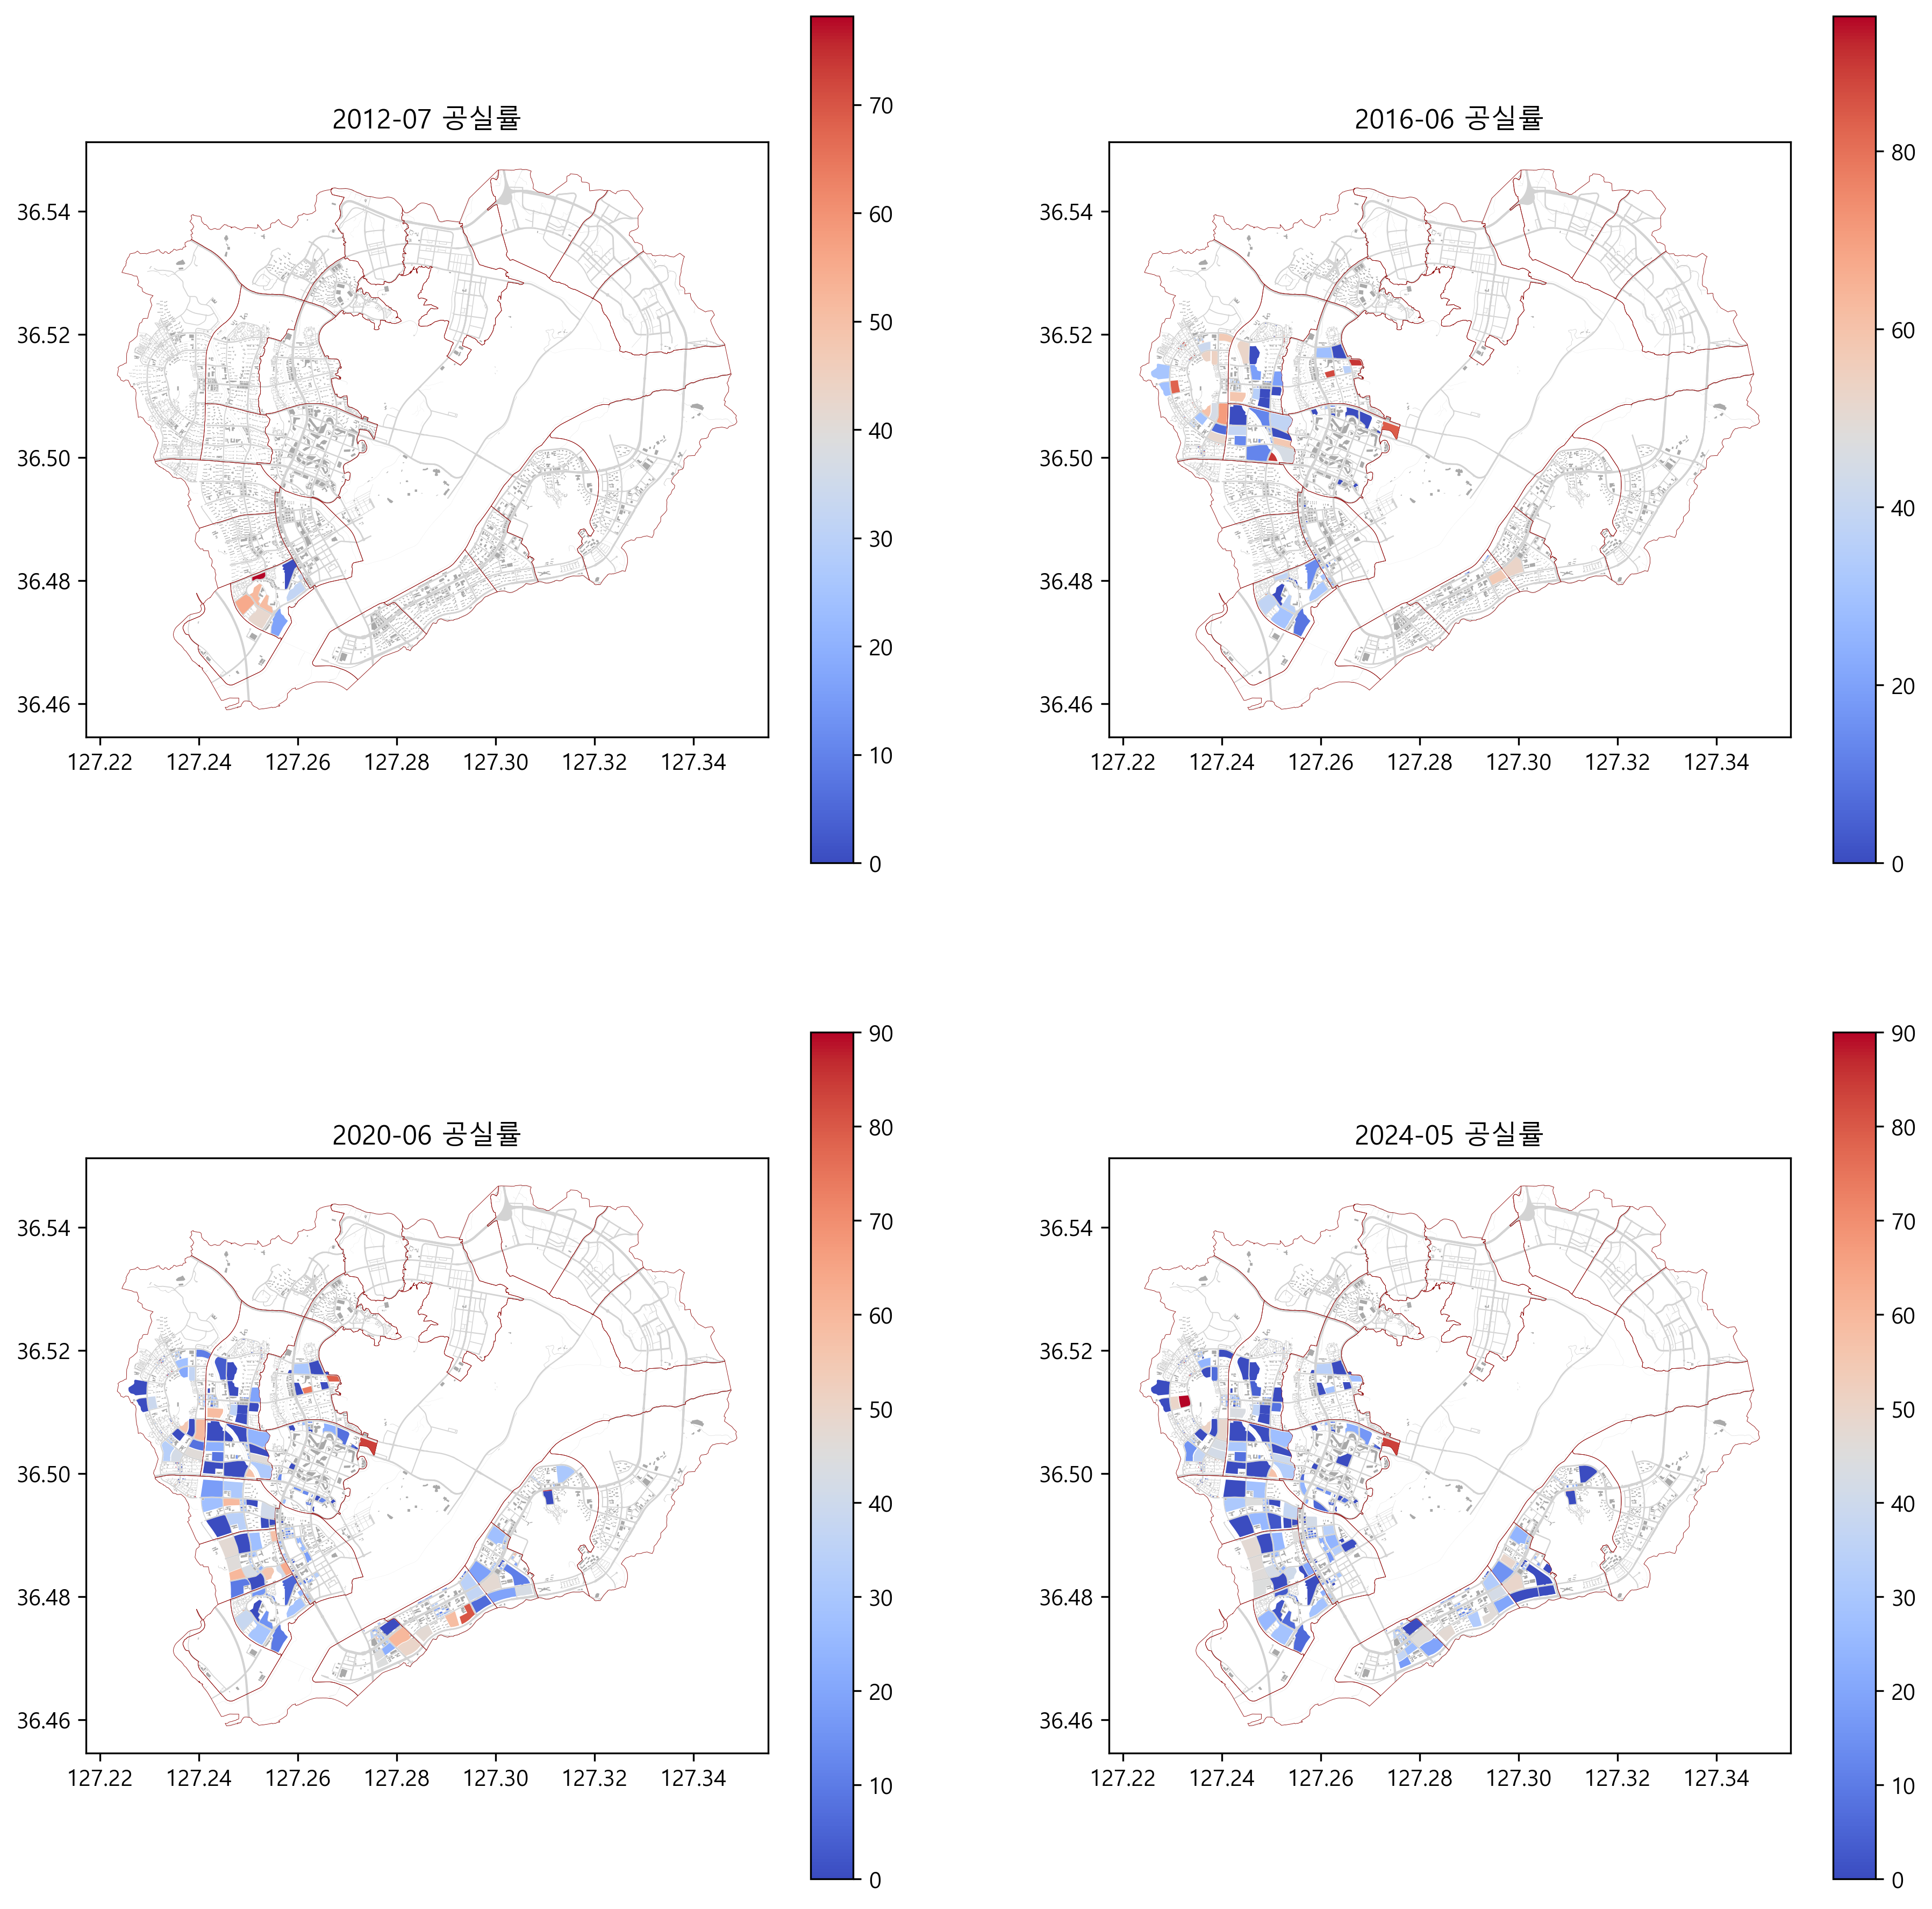

In [30]:
# 2012.07, 2016.06, 2020.06, 2024.05 공실률 시각화
fig, ax = plt.subplots(2, 2, figsize=(15, 15), dpi =300)
df[df['date'] == '2012-07'].plot(column='vacancy_rat', ax=ax[0, 0], legend=True, cmap='coolwarm', zorder=4)
# 도로,건물, 세종시 경계 데이터
rw_poly_clipped.plot(ax=ax[0,0], facecolor='lightgrey', zorder=1)
building_clipped.plot(ax=ax[0,0], facecolor='darkgrey', zorder=2)
sejong_zone_adm_boundary.plot(ax=ax[0,0], facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)
ax[0, 0].set_title('2012-07 공실률')
df[df['date'] == '2016-06'].plot(column='vacancy_rat', ax=ax[0, 1], legend=True, cmap='coolwarm', zorder=4)
# 도로,건물, 세종시 경계 데이터
rw_poly_clipped.plot(ax=ax[0,1], facecolor='lightgrey', zorder=1)
building_clipped.plot(ax=ax[0,1], facecolor='darkgrey', zorder=2)
sejong_zone_adm_boundary.plot(ax=ax[0,1], facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)
ax[0, 1].set_title('2016-06 공실률')
df[df['date'] == '2020-06'].plot(column='vacancy_rat', ax=ax[1, 0], legend=True, cmap='coolwarm', zorder=4)
# 도로,건물, 세종시 경계 데이터
rw_poly_clipped.plot(ax=ax[1,0], facecolor='lightgrey', zorder=1)
building_clipped.plot(ax=ax[1,0], facecolor='darkgrey', zorder=2)
sejong_zone_adm_boundary.plot(ax=ax[1,0], facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)
ax[1, 0].set_title('2020-06 공실률')
df[df['date'] == '2024-05'].plot(column='vacancy_rat', ax=ax[1, 1], legend=True, cmap='coolwarm', zorder=4)
# 도로,건물, 세종시 경계 데이터
rw_poly_clipped.plot(ax=ax[1,1], facecolor='lightgrey', zorder=1)
building_clipped.plot(ax=ax[1,1], facecolor='darkgrey', zorder=2)
sejong_zone_adm_boundary.plot(ax=ax[1,1], facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)
ax[1, 1].set_title('2024-05 공실률')
plt.show()